In [1]:
import numpy as np # Linear Algebra
import matplotlib.pyplot as plt # Plotting

In [2]:
def pendulum_dynamics(x, l = 1., g = 9.81):
    theta = x[0:1]
    theta_dot = x[1:]

    theta_ddot = (-g/l)*np.sin(theta)

    return np.concatenate([theta_dot, theta_ddot], axis=0)

In [3]:
def rk4_integration(x0, dt, total_time):
    times = [0.]
    states = [x0]

    t = 0.
    x = np.copy(x0)
    while t < (total_time - 1e-6):
        f1 = pendulum_dynamics(x)
        f2 = pendulum_dynamics(x + 0.5*dt*f1)
        f3 = pendulum_dynamics(x + 0.5*dt*f2)
        f4 = pendulum_dynamics(x + dt*f3)
        x = x + dt/6.*(f1 + 2.*f2 + 2.*f3 + f4)
        t += dt
        states.append(np.copy(x))
        times.append(t)
    
    return states, times

In [4]:
def plot_hist(hist, t, plot_vel = False):
    fig = plt.figure()  # no frame
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(t, [h[0] for h in hist], color='black')
    if plot_vel:
        ax.plot(t, [h[1] for h in hist], color='yellow', alpha=0.3)

    plt.show()

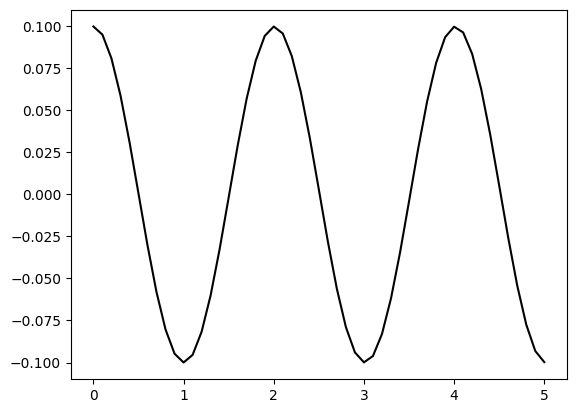

In [5]:
# RK4 works much nicer!
x0 = np.array([[0.1, 0.]]).T
dt = 0.1
total_time = 5.
hist, t = rk4_integration(x0, dt, total_time)

plot_hist(hist, t)

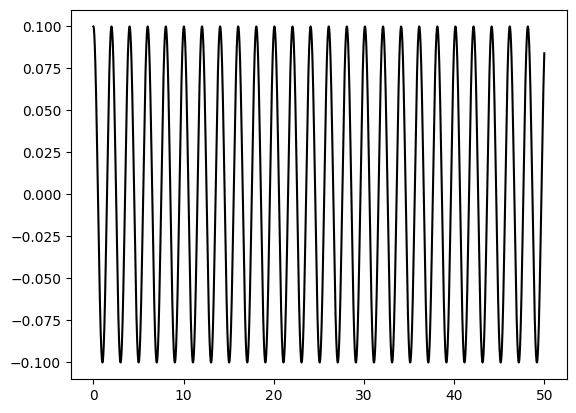

In [6]:
# RK4 works much nicer!
dt = 0.01
total_time = 50.
hist, t = rk4_integration(x0, dt, total_time)

plot_hist(hist, t)

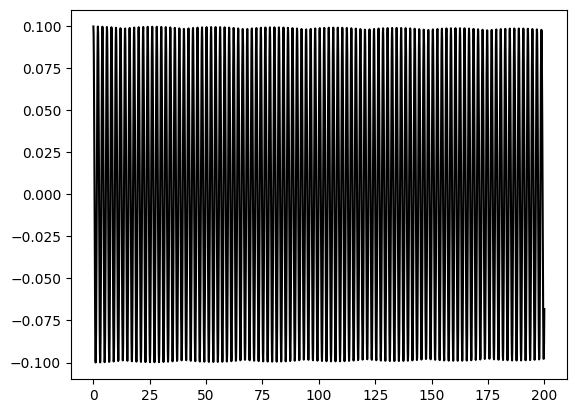

In [7]:
# RK4 works much nicer! Even in long horizons with big time step
dt = 0.1
total_time = 200.
hist, t = rk4_integration(x0, dt, total_time)

plot_hist(hist, t)

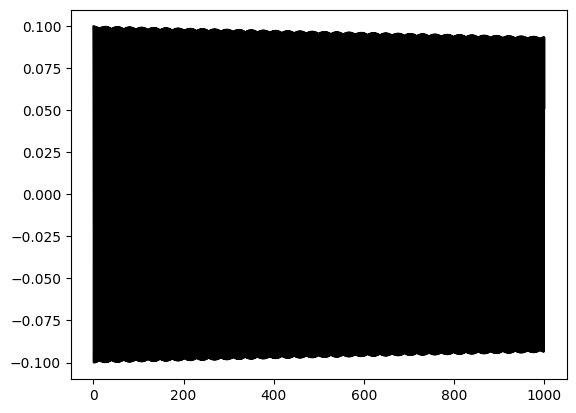

In [8]:
# RK4 damps a bit the ODE!
dt = 0.1
total_time = 1000.
hist, t = rk4_integration(x0, dt, total_time)

plot_hist(hist, t)